In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

### 用户基本信息表

In [2]:
# 训练集
user_info_cloumns = ['user_id', 'sex', 'occupation', 'education', 'marriage', 'household_type']
user_info = pd.read_table("../data/train/user_info_train.txt", names=user_info_cloumns, sep=',')

# 测试集
user_info_test = pd.read_table("../data/test/user_info_test.txt", names=user_info_cloumns, sep=',')

### 银行流水记录表

In [3]:
# 训练集
bank_detail = pd.read_table("../data/train/bank_detail_train.txt", sep=',')
bank_detail.rename(columns={'uid':'user_id', 'timespan':'time', 'type':'deal_type', 
                            'amount':'deal_amount', 'markup':'wage_type'}, inplace=True)

# 测试集
bank_detail_columns = ['user_id', 'time', 'deal_type', 'deal_amount', 'wage_type']
bank_detail_test = pd.read_table("../data/test/bank_detail_test.txt", names=bank_detail_columns, sep=',')

### 用户浏览记录表

In [4]:
# 训练集
browse_history_columns = ['user_id', 'time', 'browse_behavior', 'browse_subbehavior']
browse_history = pd.read_table("../data/train/browse_history_train.txt", names=browse_history_columns, sep=',')

# 测试集
browse_history_test = pd.read_table("../data/test/browse_history_test.txt", names=browse_history_columns, sep=',')

### 信用卡账单记录表

In [5]:
# 训练集
bill_detail_columns = ['user_id', 'time', 'bank_id', 'previous_bills', 'previous_repayment', 'creditCardQuota', 
                       'current_balance', 'current_MinRepay', 'consume_times', 'current_bills', 'adjust_money',
                       'revolving_interest', 'available_money', 'cash_Advance_Limit', 'repayment_status']
bill_detail = pd.read_table("../data/train/bill_detail_train.txt", names=bill_detail_columns, sep=',')

# 测试集
bill_detail_test = pd.read_table("../data/test/bill_detail_test.txt", names=bill_detail_columns, sep=',')

### 放款时间信息表

In [6]:
# 训练集
loan_time_columns = ['user_id', 'time']
loan_time = pd.read_table("../data/train/loan_time_train.txt", names=loan_time_columns, sep=',')

# 测试集
loan_time_test = pd.read_table("../data/test/loan_time_test.txt", names=loan_time_columns, sep=',')

### 用户逾期记录表 

In [7]:
# 训练集
overdue_columns = ['user_id', 'isOverdue']
overdue = pd.read_table("../data/train/overdue_train.txt", names=overdue_columns, sep=',')

# 测试集（预测标签）
overdue_pred = pd.read_table("../data/test/usersID_test.txt", names=['user_id'], sep=',')

# EDA

### 时间数据脱敏还原

In [99]:
# import time

# table_names = [bank_detail, browse_history, bill_detail, loan_time]

# for value in table_names:
#     value['year'] = value['time'].apply(lambda x: int(time.strftime("%Y", time.localtime(x))))
#     value['month'] = value['time'].apply(lambda x: int(time.strftime("%m", time.localtime(x))))
#     value['day'] = value['time'].apply(lambda x: int(time.strftime("%d", time.localtime(x))))
#     value.drop('time', axis=1, inplace=True)

In [131]:
# 时间戳单位为秒，量级太大，转化为天

table_names = [bank_detail, browse_history, bill_detail, loan_time]
for value in table_names:
    value['time'] = value['time'] // 86400

### 合并user_info、bill_detail、loan_time、overdue四张表

In [ ]:
#　训练集
bill_detail = pd.merge(bill_detail, loan_time, how='inner', on='user_id')
overdue = pd.merge(overdue, user_info, how='inner', on='user_id')
overdue = pd.merge(overdue, loan_time, how='inner', on='user_id')

# 测试集
bill_detail_test = pd.merge(bill_detail_test, loan_time_test, how='inner', on='user_id')
overdue_pred = pd.merge(overdue_pred, user_info_test, how='inner', on='user_id')
overdue_pred = pd.merge(overdue_pred, loan_time_test, how='inner', on='user_id')

### user_info表中的离散属性对应的逾期情况

In [ ]:
sex_analysis = overdue.groupby('sex', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
sex_analysis['overdue_rate'] = sex_analysis['sum'] / sex_analysis['count']
sex_analysis

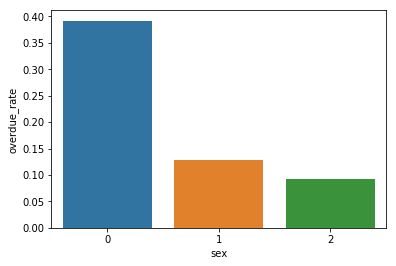

In [44]:
sns.barplot(sex_analysis['sex'], sex_analysis['overdue_rate'])
plt.show()

In [46]:
occupation_analysis = overdue.groupby('occupation', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
occupation_analysis['overdue_rate'] = occupation_analysis['sum'] / occupation_analysis['count']
occupation_analysis

,occupation,sum,count,overdue_rate
0,0,75,368,0.203804
1,1,17,93,0.182796
2,2,5204,41150,0.126464
3,3,746,5898,0.126484
4,4,1141,8087,0.141091


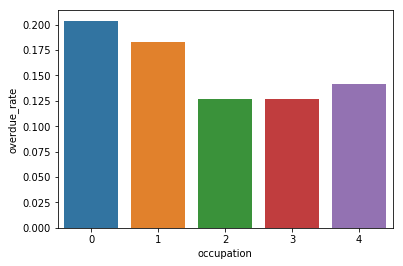

In [51]:
sns.barplot(occupation_analysis['occupation'], occupation_analysis['overdue_rate'])
plt.show()

In [48]:
education_analysis = overdue.groupby('education', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
education_analysis['overdue_rate'] = education_analysis['sum'] / education_analysis['count']
education_analysis

,education,sum,count,overdue_rate
0,0,75,369,0.203252
1,1,18,226,0.079646
2,2,813,8483,0.095839
3,3,2977,23530,0.126519
4,4,3300,22988,0.143553


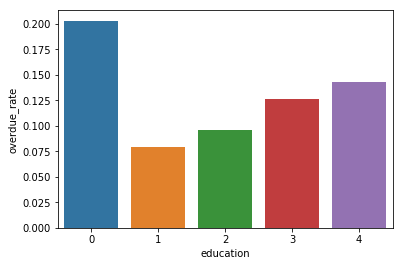

In [52]:
sns.barplot(education_analysis['education'], education_analysis['overdue_rate'])
plt.show()

In [49]:
marriage_analysis = overdue.groupby('marriage', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
marriage_analysis['overdue_rate'] = marriage_analysis['sum'] / marriage_analysis['count']
marriage_analysis

,marriage,sum,count,overdue_rate
0,0,75,370,0.202703
1,1,3169,25098,0.126265
2,2,805,6038,0.133322
3,3,2909,22554,0.128979
4,4,210,1471,0.142760
5,5,15,65,0.230769


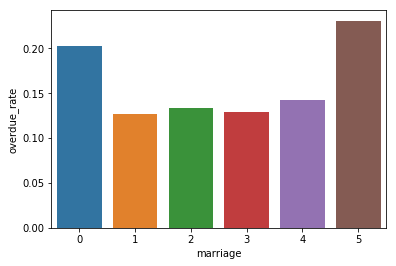

In [53]:
sns.barplot(marriage_analysis['marriage'], marriage_analysis['overdue_rate'])
plt.show()

In [50]:
household_type_analysis = overdue.groupby('household_type', as_index=False)['isOverdue'].agg({'sum': 'sum', 'count': 'count'})
household_type_analysis['overdue_rate'] = household_type_analysis['sum'] / household_type_analysis['count']
household_type_analysis

,household_type,sum,count,overdue_rate
0,0,75,369,0.203252
1,1,2033,17105,0.118854
2,2,2145,15557,0.137880
3,3,978,8216,0.119036
4,4,1952,14349,0.136037


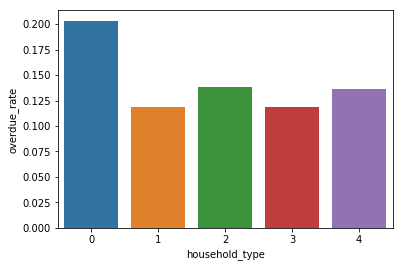

In [54]:
sns.barplot(household_type_analysis['household_type'], household_type_analysis['overdue_rate'])
plt.show()

## 训练数据构建

In [260]:
train_data = pd.merge(user_info, overdue, how='inner', on='user_id')

当前结论：  
- 时间戳非线性脱敏，应该只保留了先后关系，无法提取周期性特征  
- 对于55596个用户，在部分表中存在大量缺失值  

### 时间已知 / 放款前 用户浏览行为

In [261]:
browseAndLoan = pd.merge(browse_history, loan_time, how='left', on='user_id')

In [262]:
# 浏览记录时间 <= 放款时间，时间非0（0代表未知）
temp = browseAndLoan[(browseAndLoan['time_x'] <= browseAndLoan['time_y']) & (browseAndLoan['time_x'] > 0)]

In [263]:
# 行为是连续数值表示的类别特征
# 子行为应该是用户行为更细粒度的划分，所以将两者转化为字符串拼接，作为新特征
temp['cross_behavior'] = temp['browse_behavior'].astype(str).values + '_' + temp['browse_subbehavior'].astype(str).values

In [264]:
# 对cross_behavior进行自然数编码

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(temp['cross_behavior'])
temp['cross_behavior'] = encoder.transform(temp['cross_behavior'])

In [265]:
# 每个用户进行了多少次行为统计
to_merge = temp.groupby('user_id', as_index=False)['browse_behavior'].agg({'behavior_count': 'count'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [266]:
#　获取numpy数组的众数

from scipy import stats

def get_mode(arr):
    return stats.mode(arr)[0][0]

In [267]:
# 每个用户的不同行为数和频率最高的行为
to_merge = temp.groupby('user_id', as_index=False)['browse_behavior'].agg({'unique_behavior': 'nunique', 
                                                                           'browse_behavior_mode': get_mode})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [268]:
# 每个用户的不同子行为数和频率最高的子行为
to_merge = temp.groupby('user_id', as_index=False)['browse_subbehavior'].agg({'unique_subbehavior': 'nunique', 
                                                                              'browse_subbehavior_mode': get_mode})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [269]:
# 每个用户的不同交叉行为数和频率最高的交叉行为
to_merge = temp.groupby('user_id', as_index=False)['cross_behavior'].agg({'cross_behavior': 'nunique', 
                                                                          'cross_behavior_mode': get_mode})
train_data = train_data.merge(to_merge, how='left', on='user_id')

统计用户频率最高 / 最低的行为 / 子行为，由于特征构建速度过慢，后期再考虑

### 时间已知 / 放款前 银行流水记录

In [272]:
bankAndLoan = pd.merge(bank_detail, loan_time, how='left', on='user_id')

In [273]:
temp = bankAndLoan.loc[(bankAndLoan['time_x'] <= bankAndLoan['time_y']) & (bankAndLoan['time_x'] > 0)]

- 收入 = 工资性收入 + 非工资性收入  
- 支出统计  
- 支出与收入的比较  
- 支出和收入的其他统计特征，如均值、方差、极差之类

#### 每个用户的收入情况

In [274]:
# 变异系数
def get_cv(arr):
    return arr.mean() / arr.std()

deal_type_0 = temp[temp['deal_type'] == 0].groupby(['user_id'], as_index=False)
income_analysis = deal_type_0['deal_amount'].agg({'income_count': 'count', 'income_sum': 'sum', 
                                                  'income_median': 'median', 'income_std': 'std',
                                                  'income_cv': get_cv})

In [275]:
train_data = train_data.merge(income_analysis, how='left', on='user_id')

#### 每个用户的支出情况

In [276]:
deal_type_1 = temp[temp['deal_type'] == 1].groupby(['user_id'], as_index=False)
expen_analysis = deal_type_1['deal_amount'].agg({'expen_count': 'count', 'expen_sum': 'sum', 
                                                 'expen_median': 'median', 'expen_std': 'std',
                                                 'expen_cv': get_cv})

In [277]:
train_data = train_data.merge(expen_analysis, how='left', on='user_id')

#### 工资性收入

In [278]:
# 若存在某条记录既是工资收入，又是支出，逻辑矛盾，归为异常数据
temp[(temp['wage_type'] == 1) & (temp['deal_type'] == 1)]

,user_id,time_x,deal_type,deal_amount,wage_type,time_y


In [279]:
wage_type_1 = temp[temp['wage_type'] == 1].groupby(['user_id'], as_index=False)
wage_income = wage_type_1['deal_amount'].agg({'wages_count': 'count', 'wages_sum': 'sum'})

- 绝大部分用户缺失，是没有统计到，还是没有工资性收入？  
- 是否有工资性收入应该是个强特

In [280]:
train_data = train_data.merge(wage_income, how='left', on='user_id')

#### 非工资性收入

In [281]:
wage_type_0 = temp[(temp['wage_type'] == 0) & (temp['deal_type'] == 0)].groupby(['user_id'], as_index=False)
non_wage_income = wage_type_0['deal_amount'].agg({'non_wages_sum': 'sum', 'non_wages_median': 'median', 
                                                  'non_wages_std': 'std', 'non_wages_cv': get_cv})

In [282]:
train_data = train_data.merge(non_wage_income, how='left', on='user_id')

#### 平均每笔收入

In [283]:
train_data['per_income'] = train_data['income_sum'] / train_data['income_count']

#### 平均每笔支出

In [284]:
train_data['per_expen'] = train_data['expen_sum'] / train_data['expen_count']

### 时间已知 / 放款前 信用卡账单

In [286]:
billAndLoan = bill_detail.merge(loan_time, how='left', on='user_id')

In [287]:
temp = billAndLoan.loc[(billAndLoan['time_x'] <= billAndLoan['time_y']) & (billAndLoan['time_x'] > 0)]

In [288]:
temp['repayment_status'].value_counts()

0    1533504
1        199
Name: repayment_status, dtype: int64

极少数人是非欠款状态

In [289]:
ccards_num = temp.groupby(['user_id'], as_index=False)['bank_id'].agg({'bank_num': 'nunique'})
train_data = train_data.merge(ccards_num, how='left', on='user_id')

In [290]:
to_merge = temp.groupby(['user_id'], as_index=False)['previous_bills'].agg({'previous_bills_count': 'count', 
                                                                            'previous_bills_sum': 'sum', 
                                                                            'previous_bills_median': 'median', 
                                                                            'previous_bills_std': 'std', 
                                                                            'previous_bills_max': 'max', 
                                                                            'previous_bills_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [291]:
to_merge = temp.groupby(['user_id'], as_index=False)['previous_repayment'].agg({'previous_repayment_sum': 'sum', 
                                                                                'previous_repayment_median': 'median', 
                                                                                'previous_repayment_std': 'std', 
                                                                                'previous_repayment_max': 'max', 
                                                                                'previous_repayment_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [292]:
to_merge = temp.groupby(['user_id'], as_index=False)['creditCardQuota'].agg({'creditCardQuota_mean': 'mean', 
                                                                             'creditCardQuota_max': 'max', 
                                                                             'creditCardQuota_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [293]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_balance'].agg({'current_balance_mean': 'mean', 
                                                                             'current_balance_sum': 'sum'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [294]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_MinRepay'].agg({'current_MinRepay_mean': 'mean', 
                                                                              'current_MinRepay_sum': 'sum'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [295]:
# 极差
def get_ptp(arr):
    return arr.max() - arr.min()

to_merge = temp.groupby(['user_id'], as_index=False)['consume_times'].agg({'consume_times_median': 'median', 
                                                                           'consume_times_sum': 'sum', 
                                                                           'consume_times_ptp': get_ptp})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [296]:
to_merge = temp.groupby(['user_id'], as_index=False)['current_bills'].agg({'current_bills_sum': 'sum', 
                                                                           'current_bills_median': 'median', 
                                                                           'current_bills_std': 'std', 
                                                                           'current_bills_max': 'max', 
                                                                           'current_bills_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [297]:
to_merge = temp.groupby(['user_id'], as_index=False)['adjust_money'].agg({'adjust_money_mean': 'mean', 
                                                                          'adjust_money_sum': 'sum', 
                                                                          'adjust_money_max': 'max',
                                                                          'adjust_money_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [298]:
to_merge = temp.groupby(['user_id'], as_index=False)['revolving_interest'].agg({'revolving_interest_mean': 'mean', 
                                                                                'revolving_interest_sum': 'sum', 
                                                                                'revolving_interest_max': 'max',
                                                                                'revolving_interest_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [299]:
to_merge = temp.groupby(['user_id'], as_index=False)['available_money'].agg({'available_money_sum': 'sum', 
                                                                             'available_money_median': 'median', 
                                                                             'available_money_std': 'std', 
                                                                             'available_money_max': 'max', 
                                                                             'available_money_min': 'min'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [300]:
to_merge = temp.groupby(['user_id'], as_index=False)['cash_Advance_Limit'].agg({'cash_Advance_Limit_mean': 'mean', 
                                                                                'cash_Advance_Limit_max': 'max'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

In [301]:
# 还款次数 / 统计次数
repay_proba = temp.groupby(['user_id'], as_index=False)['repayment_status'].agg({'isRepay': 'mean'})
# 是否有过还款状态为 1 （已还款；可能存在分期还款）
repay_proba['isRepay'] = repay_proba['isRepay'].apply(lambda x: 1 if x > 0 else 0)
train_data = train_data.merge(repay_proba, how='left', on='user_id')

In [302]:
# 上期还款差额 = 上期账单金额 - 上期还款金额
temp['pre_payBalance'] = temp['previous_bills'] - temp['previous_repayment']
to_merge = temp.groupby(['user_id'], as_index=False)['pre_payBalance'].agg({'pre_payBalance_meam': 'mean', 
                                                                            'pre_payBalance_max': 'max'})
train_data = train_data.merge(to_merge, how='left', on='user_id')

### 时间已知 / 放款后 信用卡账单

In [303]:
billAndLoan.loc[(billAndLoan['time_x'] > billAndLoan['time_y']) & (billAndLoan['time_y'] > 0)]['user_id'].nunique()

34998

后期再考虑

### 缺失值分析

In [304]:
# 各属性的缺失值数量
miss = train_data.drop('isOverdue', axis=1).isnull().sum()
miss[miss > 0].sort_values(ascending=False)

wages_count                52678
wages_sum                  52678
non_wages_cv               46352
non_wages_std              46352
expen_std                  46343
expen_cv                   46343
income_std                 46340
income_cv                  46340
expen_median               46338
per_expen                  46338
expen_count                46338
expen_sum                  46338
non_wages_sum              46333
non_wages_median           46333
income_median              46329
income_sum                 46329
income_count               46329
per_income                 46329
current_bills_std          15401
previous_bills_std         15401
previous_repayment_std     15401
available_money_std        15401
previous_repayment_min     12536
bank_num                   12536
previous_bills_count       12536
previous_bills_sum         12536
previous_bills_median      12536
previous_bills_max         12536
previous_bills_min         12536
previous_repayment_sum     12536
          

**部分缺失值太大的特征考虑drop，不然会作为噪声影响模型**

In [305]:
drop_features = ['wages_count', 'wages_sum', 'non_wages_cv', 'non_wages_std', 'expen_cv', 'income_cv']
train_data.drop(drop_features, axis=1, inplace=True)

In [306]:
fill_median = ['expen_count', 'income_count', 'previous_bills_count']

# 标志缺失
for feat in fill_median:
    train_data[feat + '_nan'] = train_data[feat].isnull().apply(lambda x: 1 if x == True else 0)

# 连续整型用中位数填充
for feat in fill_median:
    train_data[feat] = train_data[feat].fillna(train_data[feat].median())  

In [307]:
fill_mode = ['bank_num', 'cross_behavior', 'unique_subbehavior', 'unique_behavior', 'behavior_count', 
             'browse_behavior_mode', 'browse_subbehavior_mode', 'cross_behavior_mode']

# 标志缺失
for feat in fill_mode:
    train_data[feat + '_nan'] = train_data[feat].isnull().apply(lambda x: 1 if x == True else 0)

# 离散整型用众数填充
for feat in fill_mode:
    train_data[feat] = train_data[feat].fillna(train_data[feat].mode()[0])

In [308]:
# 还款状态，缺失值用-1填充，作为一个新类别
train_data['isRepay'] = train_data['isRepay'].fillna(-1)

In [309]:
miss = train_data.drop('isOverdue', axis=1).isnull().sum()
numeric_feats = miss[miss > 0].keys().values

# 标志缺失
for feat in numeric_feats:
    train_data[feat + '_nan'] = train_data[feat].isnull().apply(lambda x: 1 if x == True else 0)

# 连续数值型使用均值填充
for feat in numeric_feats:
    train_data[feat] = train_data[feat].fillna(train_data[feat].mean())

### 特征重要性评估

In [318]:
X_train = train_data.drop(['user_id', 'isOverdue'], axis=1).values
y_train = train_data['isOverdue']

In [319]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=2000, random_state=1996, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=1996, verbose=0,
            warm_start=False)

In [334]:
features = train_data.drop(['user_id', 'isOverdue'], axis=1).columns.values
features_importance = pd.DataFrame({'features': features, 'importance': rf_clf.feature_importances_ * 100}).sort_values('importance', ascending=False)

In [360]:
# pd.set_option('max_rows', features_importance.shape[0])   # tips显示指定长度的行而不会省略

# 筛选特征
select_features = features_importance[features_importance['importance'] > 0.2]['features'].values

### 模型构建

In [373]:
data = train_data[select_features].values
labels = train_data['isOverdue'].values

In [314]:
from sklearn import metrics

def ks(y_true, y_predict_proba):
     # false_postive, true_postive, threshold, 标签1 --> postive
    fpr, tpr, thres = metrics.roc_curve(y_true, y_predict_proba, pos_label=1)
    return 'ks', abs(fpr - tpr).max(), False

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import lightgbm as lgb

# params = {
#     'num_leaves': [10, 20, 30],
#     'max_depth': [6, 7, 8],
#     'learning_rate': [0.7, 0.5, 0.3],
#     'n_estimators': [10, 20, 40]
# }

# lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=1996, n_jobs=-1, silent=True)
# grid_search = GridSearchCV(estimator=lgb_clf, param_grid=params, cv=5, verbose=1)
# grid_search.fit(data, labels)

In [377]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1996)

In [418]:
lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=6, learning_rate=0.03, n_estimators=280,
                             max_bin=425,  objective='binary', is_unbalance=True, min_child_weight=5, min_child_samples=10, 
                             subsample=0.8, subsample_freq=1, colsample_bytree=1, reg_alpha=3, reg_lambda=5, seed=1996, 
                             n_jobs=-1, silent=True)
 
lgb_clf.fit(X_train, y_train, eval_names=['train', 'valid'], eval_metric=ks, 
            eval_set=[(X_train, y_train), (X_test, y_test)])

[1]	train's binary_logloss: 0.381981	train's ks: 0.215059	valid's binary_logloss: 0.385624	valid's ks: 0.199872
[2]	train's binary_logloss: 0.381449	train's ks: 0.223291	valid's binary_logloss: 0.385064	valid's ks: 0.20934
[3]	train's binary_logloss: 0.381944	train's ks: 0.226727	valid's binary_logloss: 0.385533	valid's ks: 0.210083
[4]	train's binary_logloss: 0.383145	train's ks: 0.231795	valid's binary_logloss: 0.386716	valid's ks: 0.218088
[5]	train's binary_logloss: 0.384894	train's ks: 0.232126	valid's binary_logloss: 0.388574	valid's ks: 0.220171
[6]	train's binary_logloss: 0.387094	train's ks: 0.238066	valid's binary_logloss: 0.39091	valid's ks: 0.213852
[7]	train's binary_logloss: 0.389624	train's ks: 0.240018	valid's binary_logloss: 0.39358	valid's ks: 0.214743
[8]	train's binary_logloss: 0.392331	train's ks: 0.243257	valid's binary_logloss: 0.396328	valid's ks: 0.216343
[9]	train's binary_logloss: 0.395285	train's ks: 0.249836	valid's binary_logloss: 0.399363	valid's ks: 0.22

[78]	train's binary_logloss: 0.568122	train's ks: 0.348407	valid's binary_logloss: 0.580551	valid's ks: 0.276746
[79]	train's binary_logloss: 0.568937	train's ks: 0.348642	valid's binary_logloss: 0.581478	valid's ks: 0.277553
[80]	train's binary_logloss: 0.569491	train's ks: 0.349872	valid's binary_logloss: 0.582245	valid's ks: 0.279773
[81]	train's binary_logloss: 0.570248	train's ks: 0.350271	valid's binary_logloss: 0.583188	valid's ks: 0.281103
[82]	train's binary_logloss: 0.571077	train's ks: 0.352135	valid's binary_logloss: 0.584171	valid's ks: 0.281324
[83]	train's binary_logloss: 0.571616	train's ks: 0.353604	valid's binary_logloss: 0.584798	valid's ks: 0.281415
[84]	train's binary_logloss: 0.572052	train's ks: 0.354484	valid's binary_logloss: 0.585375	valid's ks: 0.283241
[85]	train's binary_logloss: 0.572575	train's ks: 0.35527	valid's binary_logloss: 0.586099	valid's ks: 0.281669
[86]	train's binary_logloss: 0.573166	train's ks: 0.356576	valid's binary_logloss: 0.586815	valid

[154]	train's binary_logloss: 0.578212	train's ks: 0.420125	valid's binary_logloss: 0.601863	valid's ks: 0.288273
[155]	train's binary_logloss: 0.578046	train's ks: 0.420427	valid's binary_logloss: 0.601844	valid's ks: 0.28715
[156]	train's binary_logloss: 0.577672	train's ks: 0.420945	valid's binary_logloss: 0.601651	valid's ks: 0.288117
[157]	train's binary_logloss: 0.577621	train's ks: 0.421401	valid's binary_logloss: 0.601702	valid's ks: 0.288393
[158]	train's binary_logloss: 0.577455	train's ks: 0.422262	valid's binary_logloss: 0.601717	valid's ks: 0.2876
[159]	train's binary_logloss: 0.577163	train's ks: 0.423369	valid's binary_logloss: 0.601562	valid's ks: 0.286755
[160]	train's binary_logloss: 0.576879	train's ks: 0.423424	valid's binary_logloss: 0.601471	valid's ks: 0.285952
[161]	train's binary_logloss: 0.576754	train's ks: 0.423621	valid's binary_logloss: 0.60146	valid's ks: 0.28464
[162]	train's binary_logloss: 0.576611	train's ks: 0.425095	valid's binary_logloss: 0.601456	

[227]	train's binary_logloss: 0.560462	train's ks: 0.465251	valid's binary_logloss: 0.593197	valid's ks: 0.284813
[228]	train's binary_logloss: 0.560206	train's ks: 0.465762	valid's binary_logloss: 0.593054	valid's ks: 0.285693
[229]	train's binary_logloss: 0.559884	train's ks: 0.467091	valid's binary_logloss: 0.592898	valid's ks: 0.285693
[230]	train's binary_logloss: 0.559629	train's ks: 0.467222	valid's binary_logloss: 0.592701	valid's ks: 0.286841
[231]	train's binary_logloss: 0.559485	train's ks: 0.468208	valid's binary_logloss: 0.592635	valid's ks: 0.287576
[232]	train's binary_logloss: 0.559244	train's ks: 0.46846	valid's binary_logloss: 0.592469	valid's ks: 0.285901
[233]	train's binary_logloss: 0.558991	train's ks: 0.469017	valid's binary_logloss: 0.592347	valid's ks: 0.287119
[234]	train's binary_logloss: 0.558778	train's ks: 0.468971	valid's binary_logloss: 0.592209	valid's ks: 0.28733
[235]	train's binary_logloss: 0.558554	train's ks: 0.469685	valid's binary_logloss: 0.5921

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
        importance_type='split', is_unbalance=True, learning_rate=0.03,
        max_bin=425, max_depth=6, min_child_samples=10, min_child_weight=5,
        min_split_gain=0.0, n_estimators=280, n_jobs=-1, num_leaves=40,
        objective='binary', random_state=None, reg_alpha=3, reg_lambda=5,
        seed=1996, silent=True, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=1)